In [48]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [49]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [50]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_GLD.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

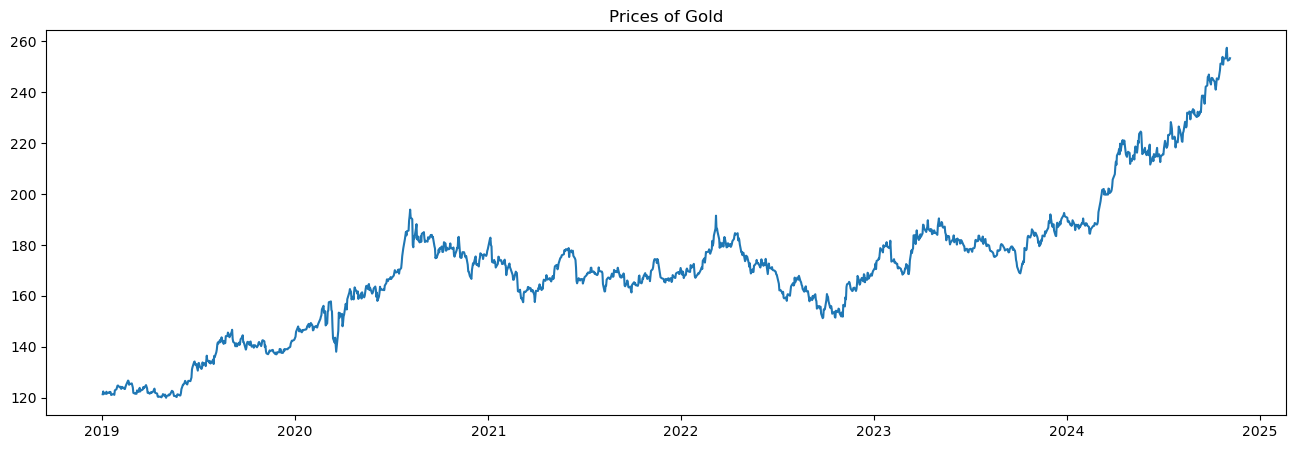

In [51]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [52]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [53]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [9]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [31]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11409, saving model to save_model_7_2_1.keras
19/19 - 4s - 210ms/step - loss: 0.1141
Epoch 2/80

Epoch 2: loss improved from 0.11409 to 0.04494, saving model to save_model_7_2_1.keras
19/19 - 1s - 53ms/step - loss: 0.0449
Epoch 3/80

Epoch 3: loss improved from 0.04494 to 0.02827, saving model to save_model_7_2_1.keras
19/19 - 1s - 51ms/step - loss: 0.0283
Epoch 4/80

Epoch 4: loss improved from 0.02827 to 0.02511, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0251
Epoch 5/80

Epoch 5: loss improved from 0.02511 to 0.02400, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0240
Epoch 6/80

Epoch 6: loss improved from 0.02400 to 0.02279, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0228
Epoch 7/80

Epoch 7: loss improved from 0.02279 to 0.02261, saving model to save_model_7_2_1.keras
19/19 - 1s - 53ms/step - loss: 0.0226
Epoch 8/80

Epoch 8: loss did not improve from 0.02261


In [40]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [33]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [34]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [35]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [36]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9431171417236328], [0.8956955075263977], [0.8489262461662292], [0.8109029531478882], [0.7794473767280579], [0.7514795660972595], [0.7258977293968201], [0.7029338479042053], [0.6831105351448059], [0.666705846786499], [0.6536592245101929], [0.6436747312545776], [0.6363474130630493], [0.6312474608421326], [0.6279582977294922], [0.6260881423950195], [0.6252670288085938], [0.6251457333564758], [0.6253966093063354], [0.6257184147834778], [0.6258429884910583], [0.6255428194999695], [0.624636709690094], [0.6229944229125977], [0.6205389499664307], [0.6172454953193665], [0.6131381392478943], [0.6082842946052551], [0.6027877926826477], [0.5967796444892883]]


In [37]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [38]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[249.67519415]
 [243.15187427]
 [236.71829479]
 [231.48781069]
 [227.16078167]
 [223.31352971]
 [219.79449231]
 [216.63558083]
 [213.90868598]
 [211.65205708]
 [209.85736375]
 [208.48389689]
 [207.47595101]
 [206.7744016 ]
 [206.32194433]
 [206.06468577]
 [205.95173338]
 [205.93504798]
 [205.96955848]
 [206.01382604]
 [206.03096239]
 [205.98967115]
 [205.86502669]
 [205.63911372]
 [205.30133887]
 [204.84829125]
 [204.28328336]
 [203.61558851]
 [202.85948971]
 [202.03300886]]


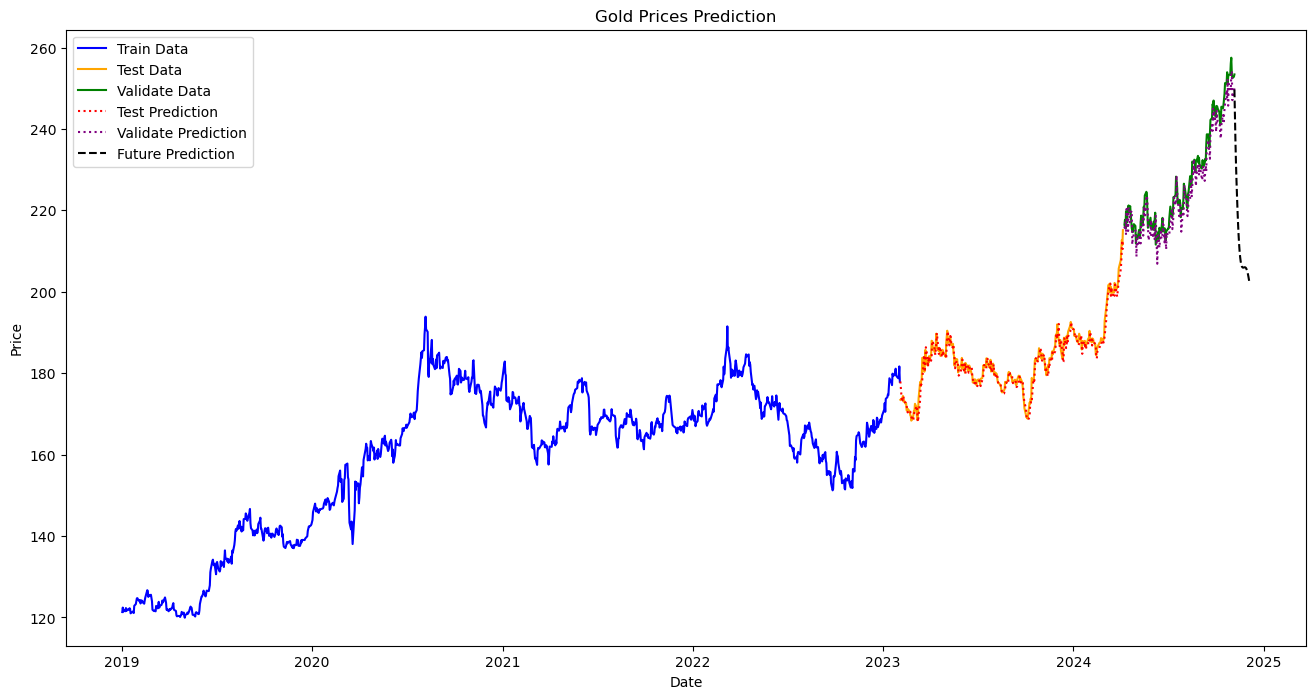

In [39]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [18]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.5288116032027266
MAPE:  0.8203764132448617
RMSE:  1.9966176567686127

** Validate **
MAE:  6.410932283566038
MAPE:  2.7706350636918913
RMSE:  7.119218715698898


# Split dataset (6-3-1)

---



In [75]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [76]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [77]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [78]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10904, saving model to save_model_6_3_1.keras
16/16 - 4s - 240ms/step - loss: 0.1090
Epoch 2/80

Epoch 2: loss improved from 0.10904 to 0.03735, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0374
Epoch 3/80

Epoch 3: loss improved from 0.03735 to 0.02465, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0247
Epoch 4/80

Epoch 4: loss improved from 0.02465 to 0.02270, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0227
Epoch 5/80

Epoch 5: loss improved from 0.02270 to 0.02260, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0226
Epoch 6/80

Epoch 6: loss improved from 0.02260 to 0.02206, saving model to save_model_6_3_1.keras
16/16 - 1s - 51ms/step - loss: 0.0221
Epoch 7/80

Epoch 7: loss improved from 0.02206 to 0.02077, saving model to save_model_6_3_1.keras
16/16 - 1s - 52ms/step - loss: 0.0208
Epoch 8/80

Epoch 8: loss improved from 0.02077 to 0.02

In [79]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [80]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [81]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [82]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [83]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9007712602615356], [0.790446937084198], [0.688387930393219], [0.6158236265182495], [0.5687536597251892], [0.536292314529419], [0.5113165974617004], [0.4912453293800354], [0.47572633624076843], [0.4648624658584595], [0.45847204327583313], [0.4559847116470337], [0.4565812945365906], [0.4593610167503357], [0.463460236787796], [0.46811455488204956], [0.4726797044277191], [0.4766255021095276], [0.4795215129852295], [0.48102277517318726], [0.48086345195770264], [0.4788615107536316], [0.47492924332618713], [0.4690842628479004], [0.4614534080028534], [0.45226532220840454], [0.4418306350708008], [0.43051180243492126], [0.4186885952949524], [0.40672558546066284]]


In [84]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [85]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[243.8500948 ]
 [228.67388117]
 [214.63464445]
 [204.65269899]
 [198.17775447]
 [193.7123719 ]
 [190.27671232]
 [187.51570873]
 [185.38091607]
 [183.88648209]
 [183.00741557]
 [182.66525824]
 [182.74732418]
 [183.12970276]
 [183.69359146]
 [184.33383945]
 [184.96182141]
 [185.50460533]
 [185.90298058]
 [186.1094942 ]
 [186.0875777 ]
 [185.81219067]
 [185.27126797]
 [184.46723247]
 [183.4175321 ]
 [182.15361904]
 [180.7182235 ]
 [179.16120491]
 [177.53480456]
 [175.88917296]]


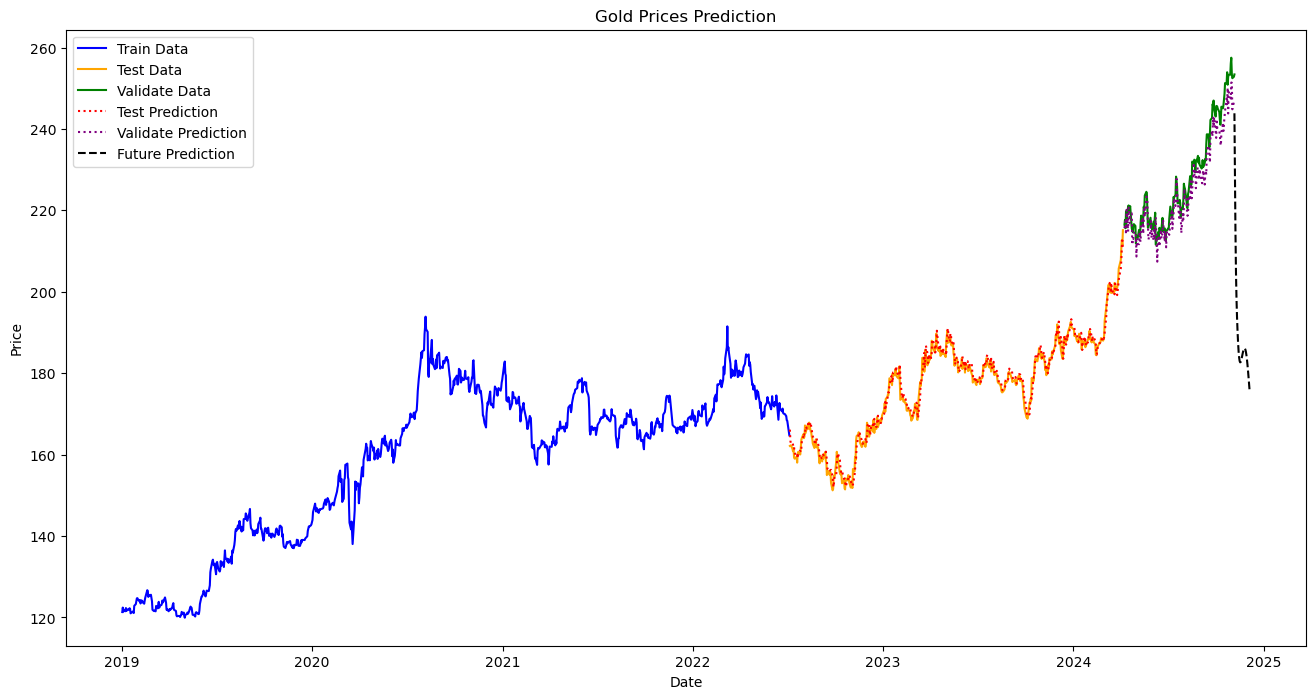

In [86]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [30]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.239183040869473
MAPE:  0.7042987710266725
RMSE:  1.6182963637195127

** Validate **
MAE:  3.1446153812209676
MAPE:  1.362411715547362
RMSE:  3.8625132670688913


# Split dataset (5-3-2)

---



In [87]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [88]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [89]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [90]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11076, saving model to save_model_5_3_2.keras
13/13 - 4s - 299ms/step - loss: 0.1108
Epoch 2/80

Epoch 2: loss improved from 0.11076 to 0.04146, saving model to save_model_5_3_2.keras
13/13 - 1s - 58ms/step - loss: 0.0415
Epoch 3/80

Epoch 3: loss improved from 0.04146 to 0.02758, saving model to save_model_5_3_2.keras
13/13 - 1s - 68ms/step - loss: 0.0276
Epoch 4/80

Epoch 4: loss improved from 0.02758 to 0.02456, saving model to save_model_5_3_2.keras
13/13 - 1s - 56ms/step - loss: 0.0246
Epoch 5/80

Epoch 5: loss improved from 0.02456 to 0.02327, saving model to save_model_5_3_2.keras
13/13 - 1s - 60ms/step - loss: 0.0233
Epoch 6/80

Epoch 6: loss improved from 0.02327 to 0.02173, saving model to save_model_5_3_2.keras
13/13 - 1s - 59ms/step - loss: 0.0217
Epoch 7/80

Epoch 7: loss did not improve from 0.02173
13/13 - 1s - 56ms/step - loss: 0.0219
Epoch 8/80

Epoch 8: loss did not improve from 0.02173
13/13 - 1s - 61ms/step - loss: 0.0234
Epoch 

In [92]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [93]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [94]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [95]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6963506467813428, 0.6882087805444975, 0.6944606024040815, 0.7140157241468285, 0.6894445918484079, 0.6956237581382451, 0.6878452809743288, 0.6734515921509435, 0.6909712471527404, 0.6911165582922342, 0.6951876022713742, 0.6951148362043879, 0.7127799128429179, 0.7341523121689849, 0.7142338013533084, 0.7169235018945653, 0.7227391678872782, 0.7510177333704752, 0.7499999999999999, 0.7552340884891088, 0.787656243023953, 0.7799505319270229, 0.7694096993790583, 0.7399679781616976, 0.7404769008225106, 0.7461471444515347, 0.7404769008225106, 0.7152515347237837, 0.7319715342885408, 0.7297179896141549, 0.7457109893116195, 0.7750072881652913, 0.7693370438093116, 0.7662110769039442, 0.745420144584242, 0.732480344998203, 0.7313899567849366, 0.7565425553627664, 0.7605408332749201, 0.7885286652549345, 0.7859842765801269, 0.7724628987635284, 0.7776243324098459, 0.8145536860637456, 0.8117912194555025, 0.8179703857453396, 0.8157167305737144, 0.7955073757576164, 0.8147717639971811, 0.82015116362

In [96]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.9200708270072937], [0.8325261473655701], [0.7348668575286865], [0.6524330377578735], [0.5932837724685669], [0.5556732416152954], [0.5339401960372925], [0.5219665169715881], [0.5150274038314819], [0.5103642344474792], [0.5068754553794861], [0.5044790506362915], [0.5035168528556824], [0.5043395161628723], [0.5070962905883789], [0.5116831660270691], [0.5177885293960571], [0.5249768495559692], [0.5327713489532471], [0.5407148003578186], [0.5484039187431335], [0.5555010437965393], [0.5617309808731079], [0.5668731331825256], [0.5707542896270752], [0.5732468962669373], [0.5742722153663635], [0.5738068222999573], [0.5718877911567688], [0.5686131119728088]]


In [97]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [98]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[246.50494315]
 [234.46229723]
 [221.02828556]
 [209.68868951]
 [201.55211672]
 [196.37841218]
 [193.38881449]
 [191.74171522]
 [190.78717083]
 [190.14570527]
 [189.66578883]
 [189.33613939]
 [189.20377947]
 [189.31694503]
 [189.69616692]
 [190.32713749]
 [191.16699126]
 [192.15581656]
 [193.22802788]
 [194.32072904]
 [195.37844415]
 [196.35472465]
 [197.21171478]
 [197.91906924]
 [198.45296111]
 [198.79584407]
 [198.93688697]
 [198.8728675 ]
 [198.60888558]
 [198.15842072]]


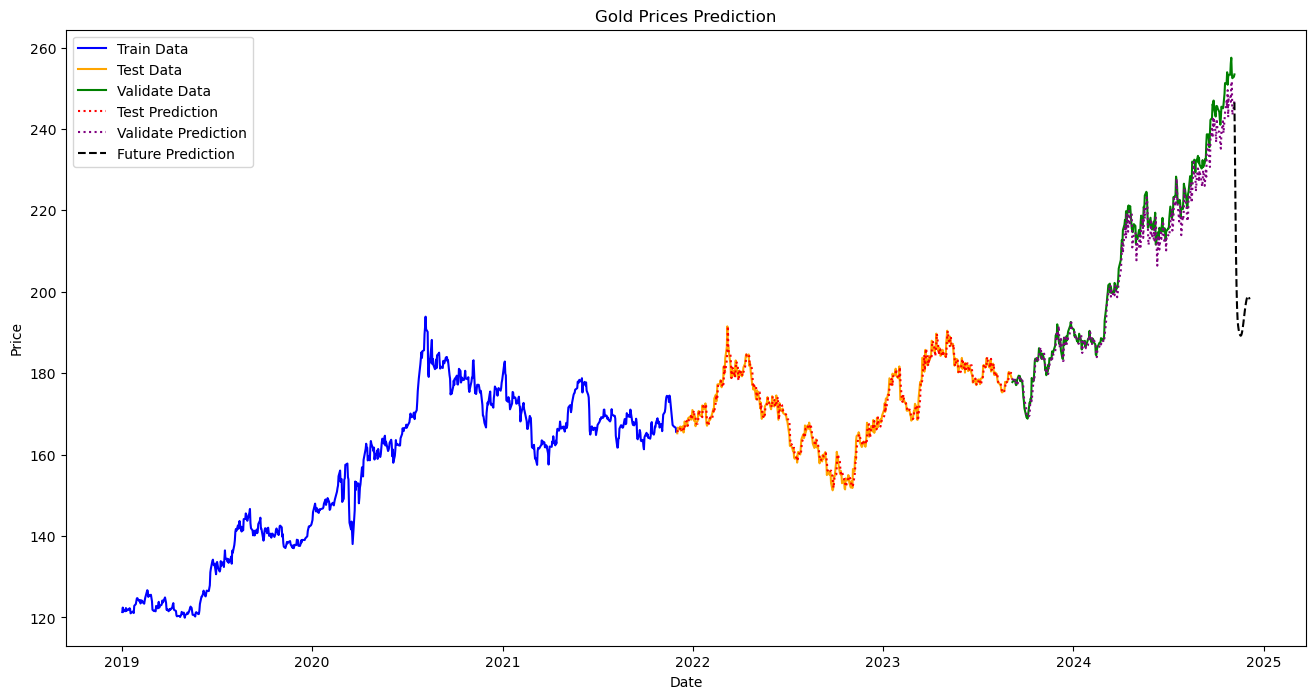

In [99]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [42]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  1.3511925183345737
MAPE:  0.7814230235020286
RMSE:  1.7422348412575328

** Validate **
MAE:  2.7956414694319394
MAPE:  1.283501662976771
RMSE:  3.5892675380897496
